In [19]:
%matplotlib inline
import numpy as np

In [64]:
import pandas as pd
c = pd.read_csv('../Data/ionosphere/ionosphere.data', header=None)
c.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [11]:
X = c.iloc[:, :34]
y = c.iloc[:, 34]

In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [14]:
y.head()

0    g
1    b
2    g
3    b
4    g
Name: 34, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [16]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [17]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [24]:
from sklearn.model_selection import cross_val_score

In [46]:
scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=5)
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 84.0%


In [38]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X.copy(), y.copy(), scoring='accuracy', cv=3)
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

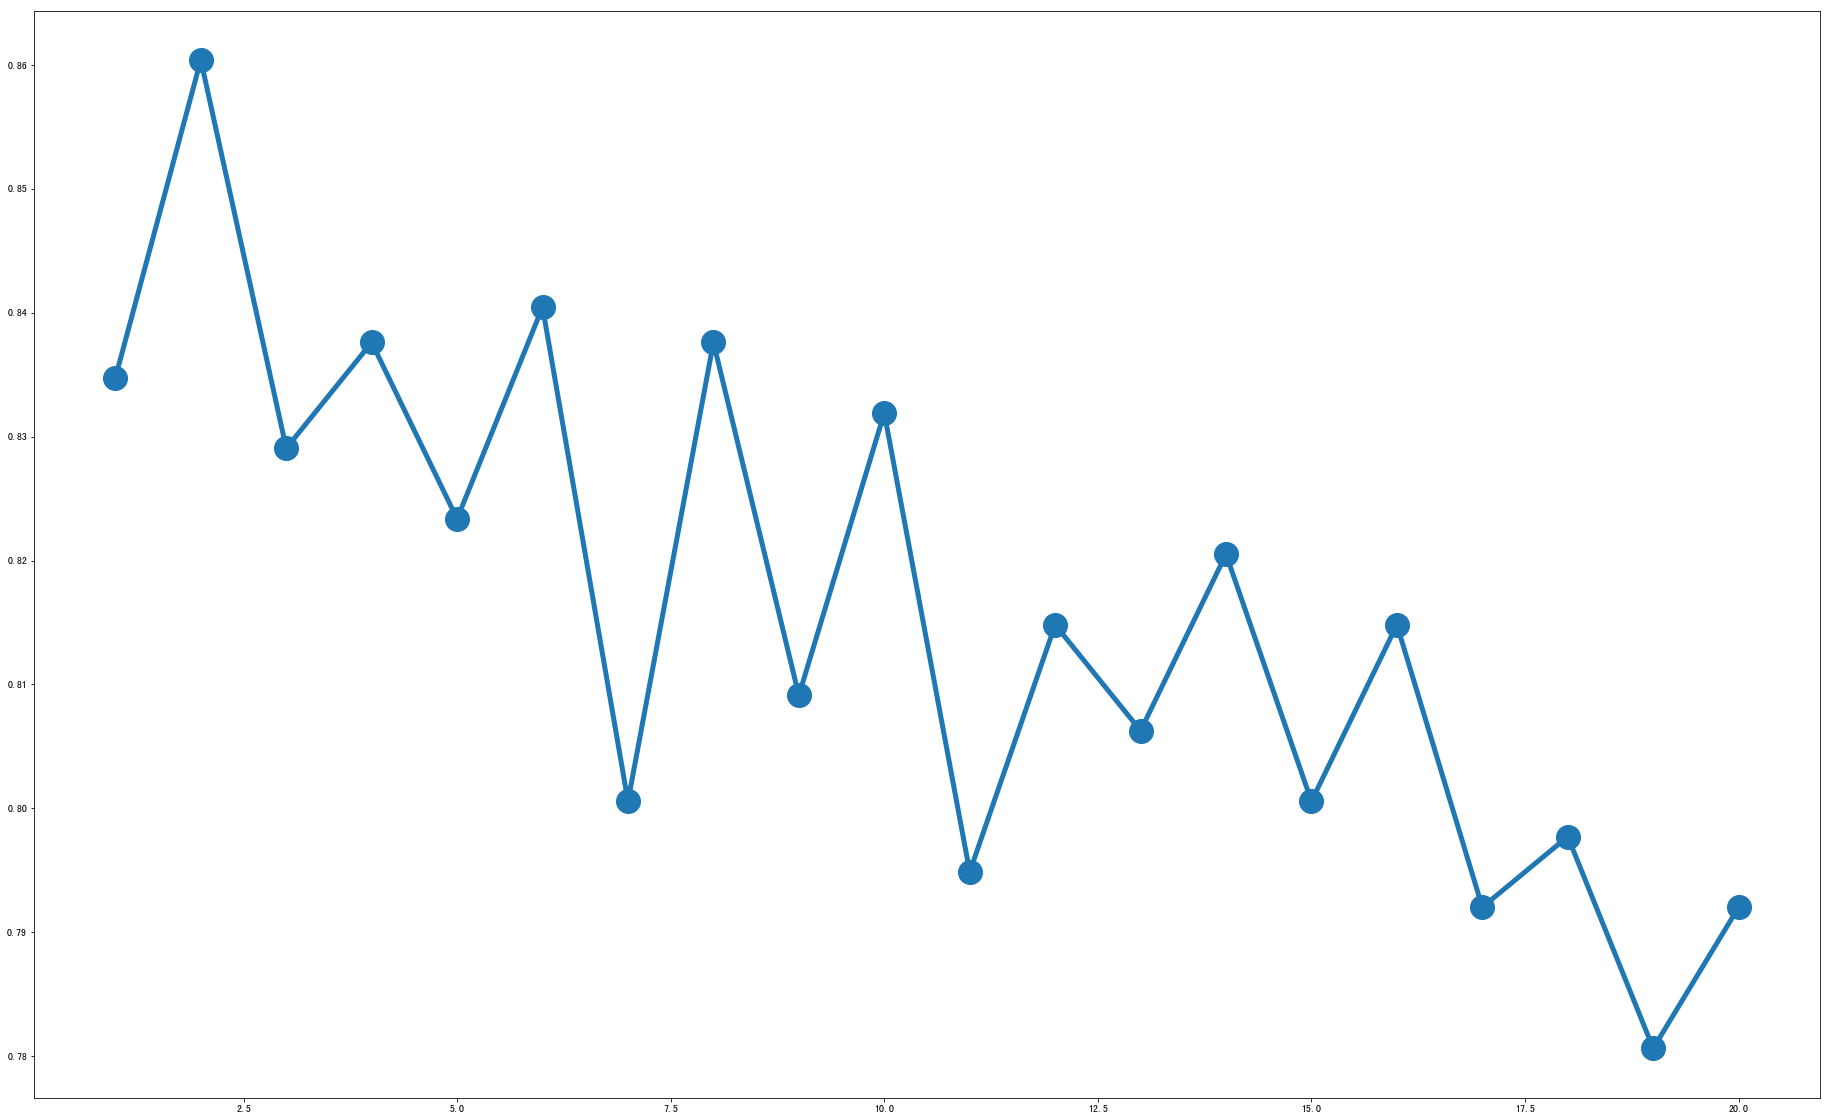

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

In [47]:
all_scores

[array([0.82051282, 0.79487179, 0.88888889]),
 array([0.83760684, 0.82905983, 0.91452991]),
 array([0.79487179, 0.79487179, 0.8974359 ]),
 array([0.81196581, 0.8034188 , 0.8974359 ]),
 array([0.82051282, 0.78632479, 0.86324786]),
 array([0.83760684, 0.8034188 , 0.88034188]),
 array([0.82905983, 0.72649573, 0.84615385]),
 array([0.83760684, 0.78632479, 0.88888889]),
 array([0.82905983, 0.74358974, 0.85470085]),
 array([0.82905983, 0.78632479, 0.88034188]),
 array([0.82905983, 0.67521368, 0.88034188]),
 array([0.82051282, 0.74358974, 0.88034188]),
 array([0.82905983, 0.72649573, 0.86324786]),
 array([0.82905983, 0.75213675, 0.88034188]),
 array([0.82051282, 0.71794872, 0.86324786]),
 array([0.82051282, 0.73504274, 0.88888889]),
 array([0.81196581, 0.68376068, 0.88034188]),
 array([0.81196581, 0.69230769, 0.88888889]),
 array([0.81196581, 0.65811966, 0.87179487]),
 array([0.81196581, 0.67521368, 0.88888889])]

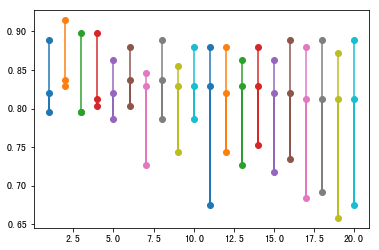

In [48]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

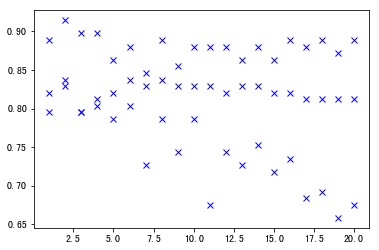

In [49]:
plt.plot(parameter_values, all_scores, 'bx', )

In [60]:
X_broken = np.array(X)
X_broken[:,::2] /= 10
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=3)
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y, scoring='accuracy', cv=3)
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

The original average accuracy for is 82.3%
The 'broken' average accuracy for is 71.5%


## 流水线在预处理中的应用

### 标准预处理

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
X_transformed = MinMaxScaler().fit_transform(X.values)
X_transformed

array([[1.      , 0.      , 0.997695, ..., 0.227565, 0.593205, 0.2735  ],
       [1.      , 0.      , 1.      , ..., 0.46856 , 0.43131 , 0.487765],
       [1.      , 0.      , 1.      , ..., 0.3791  , 0.780225, 0.30881 ],
       ...,
       [1.      , 0.      , 0.973505, ..., 0.50221 , 0.963485, 0.497115],
       [1.      , 0.      , 0.95304 , ..., 0.481215, 0.937015, 0.418785],
       [1.      , 0.      , 0.92355 , ..., 0.46661 , 0.92882 , 0.469245]])

In [63]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, scoring='accuracy', cv=3)
print("The 'transformed' average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The 'transformed' average accuracy for is 82.3%


## 2.3流水线

In [65]:
from sklearn.pipeline import Pipeline

In [68]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                            ('predict', KNeighborsClassifier())])

In [70]:
scores = cross_val_score(scaling_pipeline, X_broken, y,
                        scoring='accuracy', cv=3)
print("The 'pipeline' average accuracy for is {0:.1f}%".format(np.mean(scores) * 100))

The 'pipeline' average accuracy for is 82.3%
